In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import scipy.ndimage
import numpy as np
from skimage.filters import gaussian

In [2]:
# sort of hand-crafting appropriate kernel size for dilation based on the size of the part
def find_kernel(part):
    if part == "eyes":
        ksize = 5
        iterations = 4
    elif part == "nose":
        ksize = 5
        iterations=3
    elif part == "hair":
        ksize = 5
        iterations = 4
    elif part == "lips":
        ksize = 5
        iterations = 4
    elif part == "skin":
        ksize = 0
        iterations = 0
    elif part == "brows":
        ksize = 5
        iterations = 2
    return ksize,iterations

In [3]:
def show_blur_image(maskPath,imgPath,part):
    
    images = []
    
    org_mask = cv2.imread(os.path.join(maskPath,"{}.png".format(part)))
    org_mask = cv2.resize(org_mask, (224,224), interpolation = cv2.INTER_AREA)
    images.append(['{} Original Mask'.format(part),org_mask])
    
    ksize,iterations = find_kernel(part)

    kernel = np.ones((ksize,ksize), np.uint8)
    dilated_mask = cv2.dilate(org_mask, kernel, iterations=iterations)
    images.append(['{} Dilated Mask'.format(part),dilated_mask])
    
    blurred_mask = scipy.ndimage.gaussian_filter(dilated_mask,5)
    blurred_mask = blurred_mask/255
    images.append(['{} Gaussian Blurred Mask'.format(part),blurred_mask])
   
    face_img = cv2.imread(os.path.join(imgPath,"check.JPG"),cv2.IMREAD_COLOR)
    face_img = cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB)
    images.append(["Original Face Image",face_img])
    
    blurred_face = cv2.blur(face_img, (15, 15))
    images.append(["Average Blurred Face",blurred_face])
    
    final_image = (blurred_mask * blurred_face + (1.0 - blurred_mask)* face_img)
    final_image = final_image.astype("uint8")
    images.append(["Final Img with Blurred {}".format(part),final_image])
    
    plt.figure(figsize=(10,10))
    
    for i, item in enumerate(images):
        plt.subplot(3, 3, i + 1)
        # set the spacing between subplots
        plt.subplots_adjust(wspace=0.4, 
                    hspace=0.4)
        image = item[1]
        plt_title = item[0]
        plt.title(plt_title)
        plt.imshow(image)

In [4]:
maskPath = "/Users/amanbhatta/Downloads/BlurOperation/Example/Annotations"
imgPath = "/Users/amanbhatta/Downloads/BlurOperation/Example/Images"

# Image Displays with Respective Parts

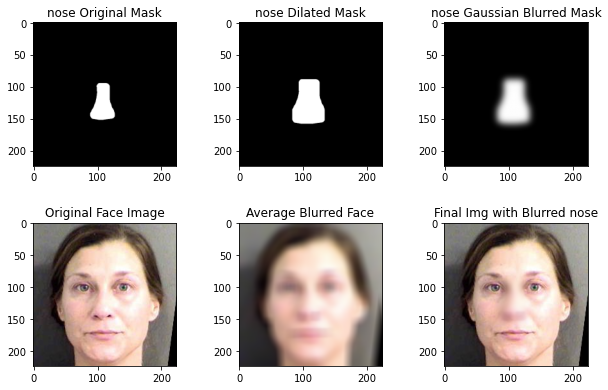

In [5]:
show_blur_image(maskPath,imgPath,"nose")

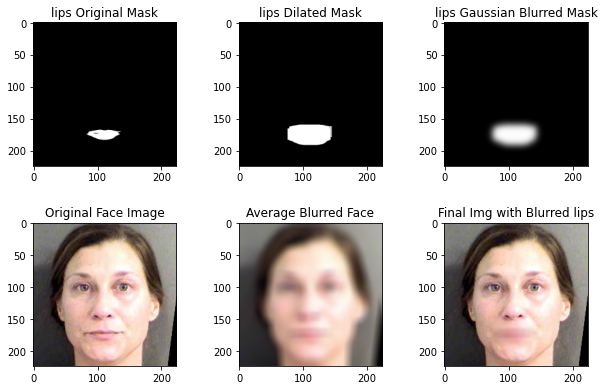

In [6]:
show_blur_image(maskPath,imgPath,"lips")

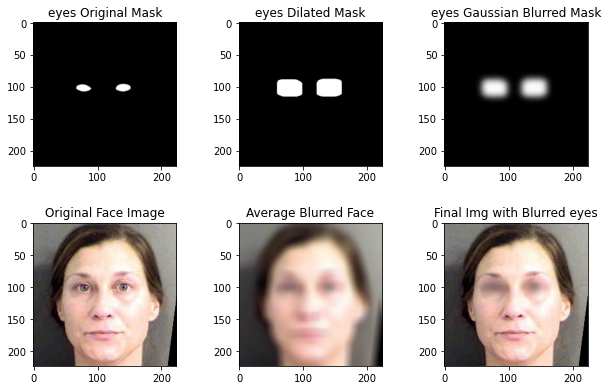

In [7]:
show_blur_image(maskPath,imgPath,"eyes")

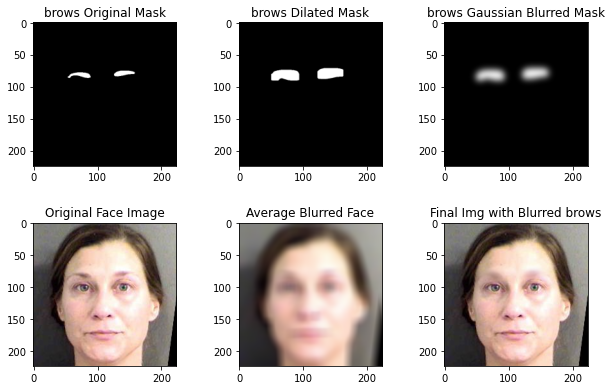

In [8]:
show_blur_image(maskPath,imgPath,"brows")

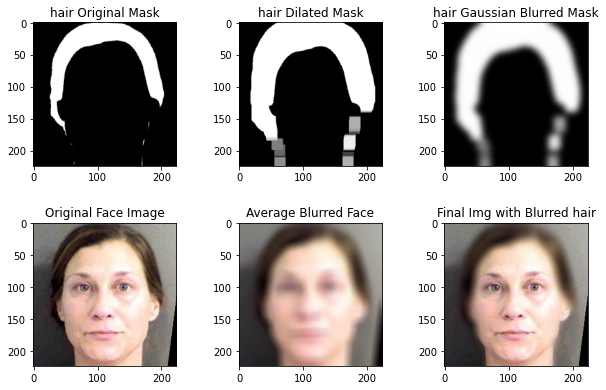

In [9]:
show_blur_image(maskPath,imgPath,"hair")